# Student Dataset Cleaning, EDA, and Preprocessing Project

## Part 1

### 1.	Check dataset structure

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("bi.csv", encoding="latin-1")
print("Shape of dataset:", df.shape)
print("============================================")
print("\nInformation:\n")
print(df.info())
print("============================================")
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (77, 11)

Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB
None

First 5 rows:
        fNAME      lNAME  Age  gender       country  residence  entryEXAM  \
0  Christina     Binger   44  Female        Norway    Private         72   
1       Alex   Walekhwa   60       M         Ken

### Notes
Columns that should be Categorical are (fNAME, lNAME, gender, country, residence, prevEducation)


Columns that should be Numerical are (Age, entryEXAM, studyHOURS, Python, DB)

### 2.	Detect inconsistent categories

In [31]:
print("\nUnique Gender Values:\n", df['gender'].unique())
print("\nUnique Country Values:\n", df['country'].unique())
print("\nUnique PrevEducation Values:\n", df['prevEducation'].unique())


Unique Gender Values:
 ['Female' 'M' 'Male' 'F' 'female' 'male']

Unique Country Values:
 ['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']

Unique PrevEducation Values:
 ['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']


#### Clean categorical inconsistencies


In [32]:
df['gender'] = df['gender'].str.strip().str.upper().replace({
    'M': 'Male',
    'F': 'Female',
    'male': 'Male',
    'female': 'Female',
    'MALE': 'Male',
    'FEMALE': 'Female'
})

df['country'] = df['country'].str.strip().str.title().replace({
    'Rsa': 'South Africa',
    'Norge': 'Norway',
    'Uk': 'UK'  # Keep UK as short form
})

df['prevEducation'] = df['prevEducation'].str.strip().str.title().replace({
    'Highschool': 'High School',
    'Barrrchelors': 'Bachelor',
    'Bachelors': 'Bachelor',
    'Diplomaaa': 'Diploma'
})
# Now, Check:
print("\nUnique Gender Values:\n", df['gender'].unique())
print("\nUnique Country Values:\n", df['country'].unique())
print("\nUnique PrevEducation Values:\n", df['prevEducation'].unique())


Unique Gender Values:
 ['Female' 'Male']

Unique Country Values:
 ['Norway' 'Kenya' 'Uganda' 'South Africa' 'Denmark' 'Netherlands' 'Italy'
 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']

Unique PrevEducation Values:
 ['Masters' 'Diploma' 'High School' 'Bachelor' 'Doctorate']


### 3.	Handle duplicates

In [33]:
duplicates = df.duplicated().sum()
print("\nNumber of duplicates found:", duplicates)
df = df.drop_duplicates()
duplicates = df.duplicated().sum()
print("\nAfter Modifying, Number of duplicates found:", duplicates)


Number of duplicates found: 0

After Modifying, Number of duplicates found: 0


# Part 2 – Missing Data

## 1.	Identify missing values

In [34]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64


### 2.	Impute missing values

#### The only missing data are numerical data in the Python column

In [35]:
# Fill numerical with median
df['Python'] = df['Python'].fillna(df['Python'].median())

# Verify
print("\nMissing values after imputation:\n", df.isnull().sum())



Missing values after imputation:
 fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64


# Part 3 – Outliers

### 1.	Detect outliers

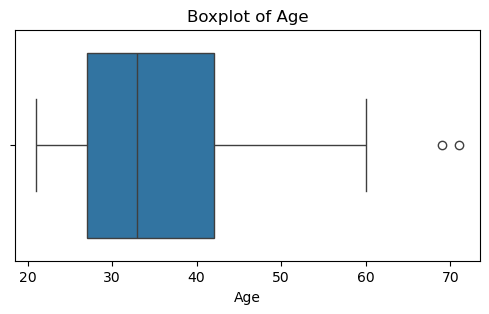


Summary statistics for Age:
 count    77.000000
mean     35.207792
std      10.341966
min      21.000000
25%      27.000000
50%      33.000000
75%      42.000000
max      71.000000
Name: Age, dtype: float64


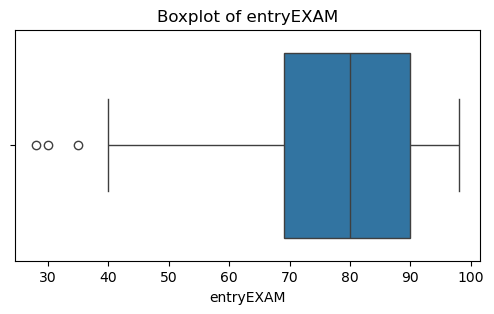


Summary statistics for entryEXAM:
 count    77.000000
mean     76.753247
std      16.475784
min      28.000000
25%      69.000000
50%      80.000000
75%      90.000000
max      98.000000
Name: entryEXAM, dtype: float64


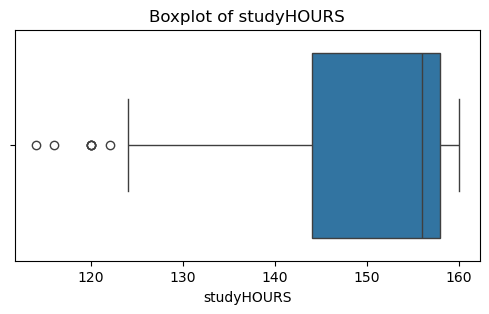


Summary statistics for studyHOURS:
 count     77.000000
mean     149.714286
std       12.743272
min      114.000000
25%      144.000000
50%      156.000000
75%      158.000000
max      160.000000
Name: studyHOURS, dtype: float64


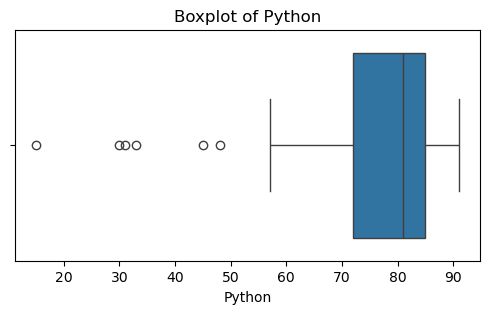


Summary statistics for Python:
 count    77.000000
mean     75.987013
std      15.228517
min      15.000000
25%      72.000000
50%      81.000000
75%      85.000000
max      91.000000
Name: Python, dtype: float64


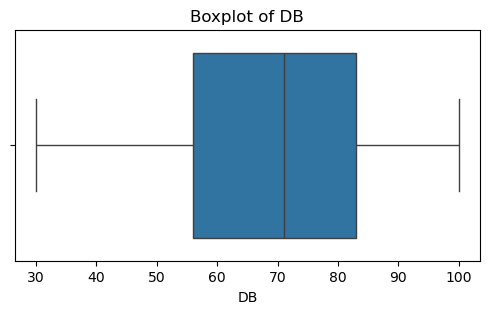


Summary statistics for DB:
 count     77.000000
mean      69.467532
std       17.033701
min       30.000000
25%       56.000000
50%       71.000000
75%       83.000000
max      100.000000
Name: DB, dtype: float64


In [36]:
for col in ['Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
    print(f"\nSummary statistics for {col}:\n",df[col].describe())

#### Notes


For studyHOURS


- **Range:** 114 → 160 hours per week  
- **Mean:** ~150 hours/week ≈ **21 hours/day of studying**  



That’s **very unrealistic**.  



##### Thus:
- studyHOURS values are **outliers / incorrectly recorded**.  
- They probably should be on a smaller scale (e.g., weekly **10–50 hrs**) or the same values but per month not week.  
- These values **need fixing** before analysis.


### 2.	Handle outliers

In [37]:
# Remove unrealistic values for exam scores (<0 or >100)
df = df[(df['Python'].between(0, 100)) & (df['DB'].between(0, 100)) & (df['entryEXAM'].between(0, 100))]

# Use IQR method for studyHOURS
Q1 = df['studyHOURS'].quantile(0.25)
Q3 = df['studyHOURS'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['studyHOURS'] >= Q1 - 1.5*IQR) & (df['studyHOURS'] <= Q3 + 1.5*IQR)]

# Part 4 – Feature Engineering

In [38]:
# Programming Average
df['Prog_Avg'] = (df['Python'] + df['DB']) / 2

# Binary feature: isAdult
df['isAdult'] = np.where(df['Age'] >= 25, 1, 0)

# Categorize study hours
def categorize_hours(hours):
    if hours < 10:
        return "Low"
    elif 10 <= hours <= 20:
        return "Medium"
    else:
        return "High"

df['studyHOURS_cat'] = df['studyHOURS'].apply(categorize_hours)

# Check new features
print(df[['Prog_Avg','isAdult','studyHOURS_cat']].head())


   Prog_Avg  isAdult studyHOURS_cat
0      57.0        1           High
1      67.5        1           High
2      62.0        1           High
5      73.5        1           High
6      85.5        1           High


Note:

I think programming average feature will add strong predictive power because it combines Python and DB scores into a single performance metric.

# Part 5 – Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns
num_cols = ['Age','entryEXAM','studyHOURS','Python','DB','Prog_Avg']

# Standard Scaling
scaler_std = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df_std[num_cols])

# MinMax Scaling
scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[num_cols] = scaler_mm.fit_transform(df_mm[num_cols])

print("Standard Scaled Sample:\n", df_std[num_cols].head())
print("\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n")
print("MinMax Scaled Sample:\n", df_mm[num_cols].head())


Standard Scaled Sample:
         Age  entryEXAM  studyHOURS    Python        DB  Prog_Avg
0  0.905699  -0.588481    0.617549 -2.134353 -0.982231 -1.649025
1  2.610544  -0.057439   -0.332526 -2.027253  0.249959 -0.683646
2 -1.118804  -1.878155   -2.707715 -0.527851 -1.290279 -1.189321
5 -1.118804  -1.043660   -2.707715  0.971551 -0.735793 -0.132001
6 -0.905699   0.777056    0.380030  0.114750  1.235711  0.971290

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

MinMax Scaled Sample:
         Age  entryEXAM  studyHOURS    Python        DB  Prog_Avg
0  0.479167   0.587302    0.944444  0.261905  0.328358  0.142857
1  0.812500   0.698413    0.722222  0.285714  0.626866  0.392857
2  0.083333   0.317460    0.166667  0.619048  0.253731  0.261905
5  0.083333   0.492063    0.166667  0.952381  0.388060  0.535714
6  0.125000   0.873016    0.888889  0.761905  0.865672  0.821429


# Part 6 – Encoding Categorical Data

In [40]:
# Encode Ordinal Feature (prevEducation)

# Define the correct order of education levels
education_order = {
    'High School': 0,
    'Diploma': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate': 4
}

# Apply mapping
df['prevEducation_encoded'] = df['prevEducation'].map(education_order)

print(df[['prevEducation','prevEducation_encoded']].head())

# Encode Nominal Features (gender, country, residence, studyHOURS_cat)

# One-Hot Encoding with pandas
df_encoded = pd.get_dummies(
    df, 
    columns=['gender','country','residence','studyHOURS_cat'], 
    drop_first=True # avoid dummy variable trap
)

print(df_encoded.head())

# Drop the Original Ordinal Column
df_encoded = df_encoded.drop(columns=['prevEducation'])



  prevEducation  prevEducation_encoded
0       Masters                    NaN
1       Diploma                    1.0
2   High School                    0.0
5   High School                    0.0
6      Bachelor                    2.0
       fNAME     lNAME  Age  entryEXAM prevEducation  studyHOURS  Python  DB  \
0  Christina    Binger   44         72       Masters         158    59.0  55   
1       Alex  Walekhwa   60         79       Diploma         150    60.0  75   
2     Philip       Leo   25         55   High School         130    74.0  50   
5     Hannah    Hansen   25         66   High School         130    88.0  59   
6        Ole  Johansen   27         90      Bachelor         156    80.0  91   

   Prog_Avg  isAdult  ...  country_Norway  country_Somali  country_Spain  \
0      57.0        1  ...            True           False          False   
1      67.5        1  ...           False           False          False   
2      62.0        1  ...           False           False

# Final Dataset

In [41]:
# Final check

print("\nFinal dataset shape:", df.shape)
print(df.head())



Final dataset shape: (70, 15)
       fNAME     lNAME  Age  gender country     residence  entryEXAM  \
0  Christina    Binger   44  Female  Norway       Private         72   
1       Alex  Walekhwa   60    Male   Kenya       Private         79   
2     Philip       Leo   25    Male  Uganda     Sognsvann         55   
5     Hannah    Hansen   25  Female  Norway  BI Residence         66   
6        Ole  Johansen   27    Male  Norway  BI-Residence         90   

  prevEducation  studyHOURS  Python  DB  Prog_Avg  isAdult studyHOURS_cat  \
0       Masters         158    59.0  55      57.0        1           High   
1       Diploma         150    60.0  75      67.5        1           High   
2   High School         130    74.0  50      62.0        1           High   
5   High School         130    88.0  59      73.5        1           High   
6      Bachelor         156    80.0  91      85.5        1           High   

   prevEducation_encoded  
0                    NaN  
1                  

In [42]:
# Save final processed dataset
df_encoded.to_csv("final_students.csv", index=False)

print("Final dataset shape:", df_encoded.shape)
print("Columns:\n", df_encoded.columns)


Final dataset shape: (70, 27)
Columns:
 Index(['fNAME', 'lNAME', 'Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB',
       'Prog_Avg', 'isAdult', 'prevEducation_encoded', 'gender_Male',
       'country_France', 'country_Germany', 'country_Italy', 'country_Kenya',
       'country_Netherlands', 'country_Nigeria', 'country_Norway',
       'country_Somali', 'country_Spain', 'country_UK', 'country_Uganda',
       'residence_BI-Residence', 'residence_BIResidence',
       'residence_BI_Residence', 'residence_Private', 'residence_Sognsvann'],
      dtype='object')
